<a href="https://colab.research.google.com/github/duonghb53/AI-Foundation-Course/blob/main/8_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression - Hồi Quy Tuyến Tính**
**Linear Regression (Hồi Quy Tuyến Tính)** thuộc nhóm Supervised learning ( Học có giám sát ). Hồi quy tuyến tính là một phương pháp rất đơn giản nhưng đã được chứng minh được tính hữu ích cho một số lượng lớn các tình huống.

**Linear Regression** là một phương pháp thống kê để hồi quy dữ liệu với biến phụ thuộc có giá trị liên tục trong khi các biến độc lập có thể có một trong hai giá trị liên tục hoặc là giá trị phân loại. Nói cách khác "Hồi quy tuyến tính" là một phương pháp để dự đoán biến phụ thuộc (Y) dựa trên giá trị của biến độc lập (X). Nó có thể được sử dụng cho các trường hợp chúng ta muốn dự đoán một số lượng liên tục. Một ví dụ đơn giản là tiên đoán giá nhà price dựa vào diện tích nhà theo công thức sau:

> ##            **𝑝𝑟𝑖𝑐𝑒 = 𝑎 ∗ 𝑎𝑟𝑒𝑎 + 𝑏   (1)**
trong đó a và b là hai tham số cần tìm.

![](https://i.imgur.com/xaFzQQc.png)


# **I. Các bước cần làm khi dùng linear regression**

- Chuẩn bị và xử lý dữ liệu
- Xây dựng mô hình
- Xây dựng hàm loss
- Tìm bộ tham số dùng giải thuật backpropagation



## **1. Chuẩn bị và xử lý dữ liệu**

Bước chuẩn bị và xử lý dữ liệu rất quan trọng và chiếm phần lớn thời gian. Với bài toán dự đoán giá nhà dựa vào diện tích nhà và bài toán dự đoán doanh thu bán hàng, chúng ta cần có dữ liệu giao dịch thực tế. Dữ liệu này dùng để huấn luyện mô hình (model) ước lượng. Phương trình (1) và (2) là ví dụ cụ thể của mô hình ước lượng.

Trong các bài học hoặc trong nghiên cứu, các bộ dữ liệu thường được xử lý trước để tạo thuận lợi cho người sử dụng về sau. Tuy nhiên, trong thực tế, các dữ liệu thu thập hầu như cần xử lý để chỉnh sửa định dạng, thêm các trường dữ liệu, hay xóa các mẫu dữ liệu không cần thiết.

## **2. Xây dựng mô hình**

Mô hình tổng quát của linear regression có dạng sau

> ℎ𝜃(𝑥)=𝜃0𝑥0+𝜃1𝑥1+…+𝜃𝑛𝑥𝑛

Trong đó 𝜃=(𝜃0,𝜃1,…,𝜃𝑛) là bộ tham số, và 𝑥=(𝑥0,𝑥1,…,𝑥𝑛) là vector đặc trưng. ℎ𝜃(𝑥) là giá trị tiên đoán dựa vào bộ tham số 𝜃 cho mẫu dữ liệu x.

Bài toán dự đoán giá nhà có một đặc trưng là diện tích nhà. Do đó, cùng với tham số bias, bộ tham số 𝜃 có chiều dài 𝑛=2. Vector đặc trưng (bao gồm bias) có dạng 𝑥=(𝑥0,𝑥1)=(1,𝑎𝑟𝑒𝑎).

Với bài toán advertising, các đặc trưng bao gồm TV, Radio, Newspaper. Do đó, vector đặc trưng (bao gồm bias) có dạng 𝑥=(𝑥0,𝑥1,𝑥2,𝑥3)=(1,𝑇𝑉,𝑅𝑎𝑑𝑖𝑜,𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟), và bộ tham số có dạng
𝜃=(𝜃0,𝜃1,𝜃2,𝜃3).

## **3. Xây dựng hàm loss**

Mục đích của hàm loss nhằm đo mức độ khác biệt (khoảng cách) giữa giá trị tiên đoán ℎ𝜃(𝑥) với giá trị thực y. Hàm loss phổ biến cho bài toán linear regression là hàm bình phương độ lệch. Bình phương độ lệch giữa hai giá trị ℎ𝜃(𝑥) và y được tính như sau:

> ### 𝐽(𝑥,𝑦;𝜃)=(ℎ𝜃(𝑥)–𝑦)2

Khi muốn tính giá trị loss cho cả bộ dữ liệu, chúng ta tính giá trị loss trung bình như sau:
> ### 𝐽(𝜃)=1𝑚∑𝑖=1𝑚(ℎ𝜃(𝑥(𝑖))–𝑦(𝑖))2

trong đó, (𝑥(𝑖),𝑦(𝑖)) là mẫu dữ liệu thứ 𝑖𝑡ℎ trong bộ dữ liệu gồm m mẫu dữ liệu. Chú ý, ở một số tài liệu, công thức tính giá trị loss trung bình ở trên còn chia thêm cho 2 như 𝐽(𝜃)=1𝑚∑𝑖=1𝑚(ℎ𝜃(𝑥(𝑖))–𝑦(𝑖))2. Việc có chia cho 2 hay không không ảnh hưởng đến quá trình huấn luyện.

## **4. Tìm bộ tham số dùng giải thuật backpropagation**

Quá trình tìm giá trị tối ưu cho bộ tham số gọi là quá trình huấn luyện mô hình. Hình sau mô tả các bước để huấn luyện mô hình.

![](https://i.imgur.com/Wma7U42.png)

Bước đầu tiên là khởi tạo giá trị cho bộ tham số 𝜃. Thông thường bộ tham số được khởi tạo với các giá trị nhỏ và ngẫu nhiên. Cụ thể, các giá trị ngẫu nhiên theo phân bố chuẩn (normal distribution) thường được sử dụng để khởi tạo giá trị cho bộ tham số.

Tiếp đó, các bước tính feed-forward, tính loss, tính đạo hàm cho từng tham số, và cập nhật tham số được thực hiện lặp đi lặp lại cho đến khi nào đạt đến điều kiện dừng. Điều kiện dừng thường là số lần sử dụng (duyệt qua) bộ dữ liệu. Một lần duyệt qua hết các mẫu trong bộ dữ liệu được gọi là một epoch.

– Tính feed-forward cho mẫu thứ 𝑖𝑡ℎ trong bộ dữ liệu

> ### ℎ𝜃(𝑥(𝑖))=𝜃0𝑥(𝑖)0+𝜃1𝑥(𝑖)1+…+𝜃𝑘𝑥(𝑖)𝑘

– Tính giá trị loss trung bình cho m mẫu dữ liệu

> ### 𝐽(𝜃)=1𝑚∑𝑖=1𝑚(ℎ𝜃(𝑥(𝑖))–𝑦(𝑖))2

– Tính đạo hàm cho từng tham số

> ### ∂𝐽(𝜃)∂𝜃𝑗=2𝑚∑𝑖=1𝑚(ℎ𝜃(𝑥(𝑖))–𝑦(𝑖))𝑥(𝑖)𝑗

– Cập nhật tham số

> ### 𝜃𝑗=𝜃𝑗–𝜂∂𝐽(𝜃)∂𝜃𝑗

trong đó 𝜂 là learning rate  và là giá trị được xác định trước.

Khi đọc các 4 công thức bên trên, các bạn cần phân biệt các biến ở dạng vector (như 𝑥(𝑖),𝑦(𝑖) và biến thông thường (như 𝜃𝑗,𝑥(𝑖)𝑗). Để hiểu rõ hơn về các bước huấn luyện cho mô hình linear regression, các bạn xem phần áp dụng cho bài toán dự đoán giá nhà dựa vào diện tích nhà.


# **II. Áp dụng cho bài toán dự đoán giá nhà(BostonHousing)**





(506, 14)
(506, 1)


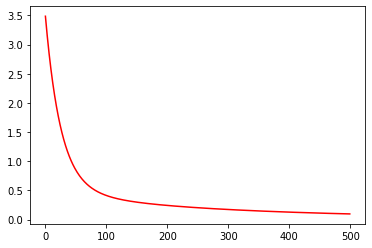

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_FILE = "/content/drive/My Drive/Colab Notebooks/data/AI_Foundation_Course/BostonHousing.csv"
data = pd.read_csv(DATA_FILE)

def normal(x:list):
    maxi = max(x)
    mini = min(x)
    avg = np.mean(x)
    new = [(i-avg)/(maxi-mini) for i in x ]
    
    return new

df = data.copy()
df = df.apply(normal, axis=0)

Xd = df.drop(columns=['medv'])
Xd.insert(0, 'X0', 1) # bias 

# numpy array format
y = df.medv.values
y = np.expand_dims(y, axis=1)

X_b = Xd.values

# sample size
m = len(df.index)
n = X_b.shape[1]
theta = np.ones(n)


print(X_b.shape)
print(y.shape)

def batch_gradient_descent():
    n_iterations = 500
    learning_rate = 0.01
    
    # khởi tạo giá trị tham số
    thetas = np.random.randn(14, 1)
    thetas_path = [thetas]
    losses = []
    
    for i in range(n_iterations):
        # tính output
        output = X_b.dot(thetas)
        
        # tính loss
        loss = (output - y)**2        
                
        # tính đạo hàm cho loss
        loss_grd = 2*(output - y)/m
        
        # tính đạo hàm cho các tham số
        gradients = X_b.T.dot(loss_grd)
        
        # cập nhật tham số
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss)/m
        losses.append(mean_loss)

    return thetas_path, losses

bgd_thetas, losses = batch_gradient_descent()

# in loss cho 100 sample đầu
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()